In [22]:
# !pip install numba
# ! pip install jax

In [23]:
import sys
import os

# Add the directory containing instruments.py to the Python path
custom_module_path = "/home/rebeccaz/Github/vampires_calibration"
sys.path.append(custom_module_path)

import instruments as inst
import numpy as np
import json

# Step 1: Setting up initial information

In [24]:
# Data path for processed csv
file_path = "/home/rebeccaz/Github/vampires_calibration/data/20230914_processed_table.csv"
wavelengths = [
            # 610, 
            # 670, 
            # 720, 
            760
            ]
obs_modes = [
            # "MBI", 
            # "MBI", 
            # "MBI", 
            "MBI"
            ]
previous_fits_directory = "/home/rebeccaz/Github/vampires_calibration/scipy_minimize/data_files/produced/FLC_0_to_43_ten_percent_retardance_constraints_dichroic_theta_0_optics_theta_0/"
save_fits_directory = "/home/rebeccaz/Github/vampires_calibration/scipy_minimize/data_files/produced/FLC_0_to_43_ten_percent_retardance_constraints_dichroic_theta_0_optics_theta_0_reduced_errors/"
em_gains = [
    # 1.230573943788524, 
    # 1.1946169522853136, 
    # 1.1968557857131294, 
    1.0798052820150867
    ]

# Step 2: Performing fits iteratively by wavelength - first broadband then MBI

{'dichroic': {'phi': 1.3689665468583827e-05, 'epsilon': 0.01504997450682239, 'theta': -9.996887142452842}, 'flc': {'phi': 3.142018014970361, 'delta_theta': 4.997519334044604}, 'optics': {'phi': 1.6956638928165768, 'epsilon': 3.092090053161828e-08, 'theta': -6.284666701463895}, 'image_rotator': {'phi': 3.271787475660674}, 'hwp': {'phi': 2.813402047306136, 'delta_theta': 4.999998765099043}, 'lp': {'theta': 1.2105102777438903}}
HWP retardance: 2.813402047306136
[[0.52293571 0.52246894 0.02208996 0.        ]
 [0.52293571 0.52246894 0.02208996 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
logl value: 60889.224338381406


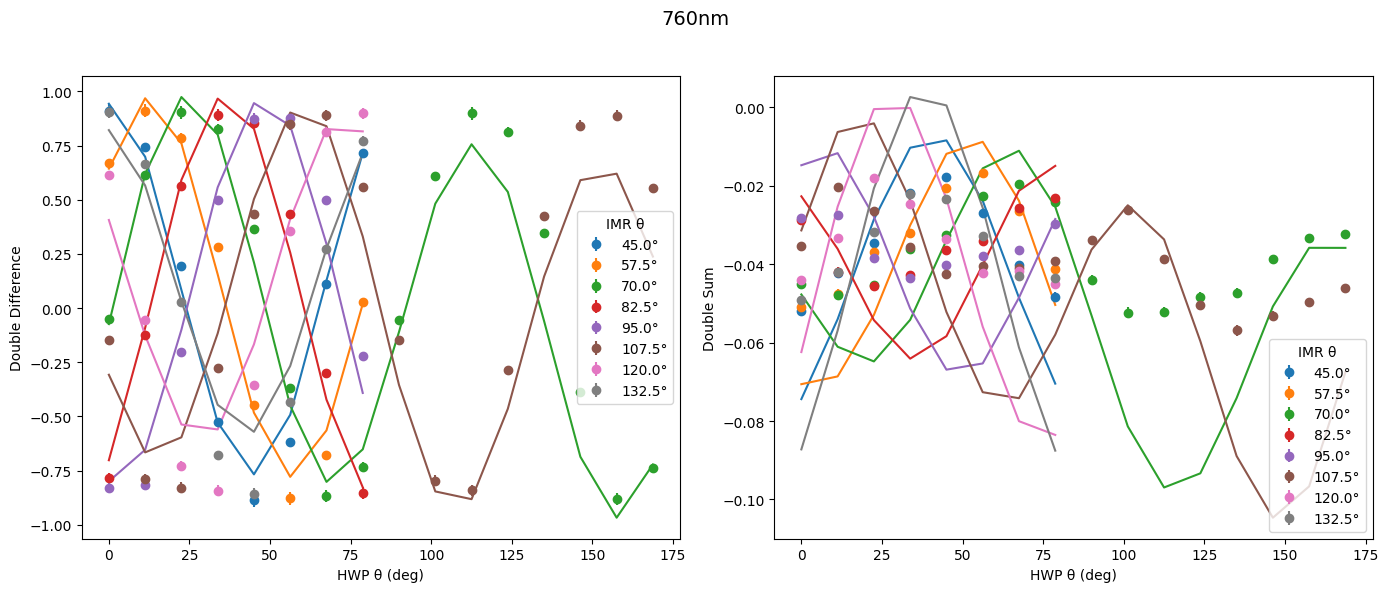

Before p0: {'dichroic': {'phi': np.float64(1.3689665468583827e-05), 'epsilon': 0.01504997450682239, 'theta': -9.996887142452842}, 'flc': {'phi': 3.142018014970361, 'delta_theta': 4.997519334044604}, 'optics': {'phi': np.float64(1.6956638928165768), 'epsilon': 3.092090053161828e-08, 'theta': -6.284666701463895}, 'image_rotator': {'phi': 3.271787475660674}, 'hwp': {'phi': 2.813402047306136, 'delta_theta': 4.999998765099043}, 'lp': {'theta': 1.2105102777438903}}
Iteration #: 1
logl_value: 60889.13784618123
Best Fit Parameters: [ 4.84381099e-06  1.50515050e-02 -1.00000000e+01  3.14203548e+00
  4.99999648e+00  1.69555736e+00  4.93347918e-09 -6.28305698e+00
  3.27176045e+00  2.81343138e+00  4.99999943e+00  1.21393505e+00]


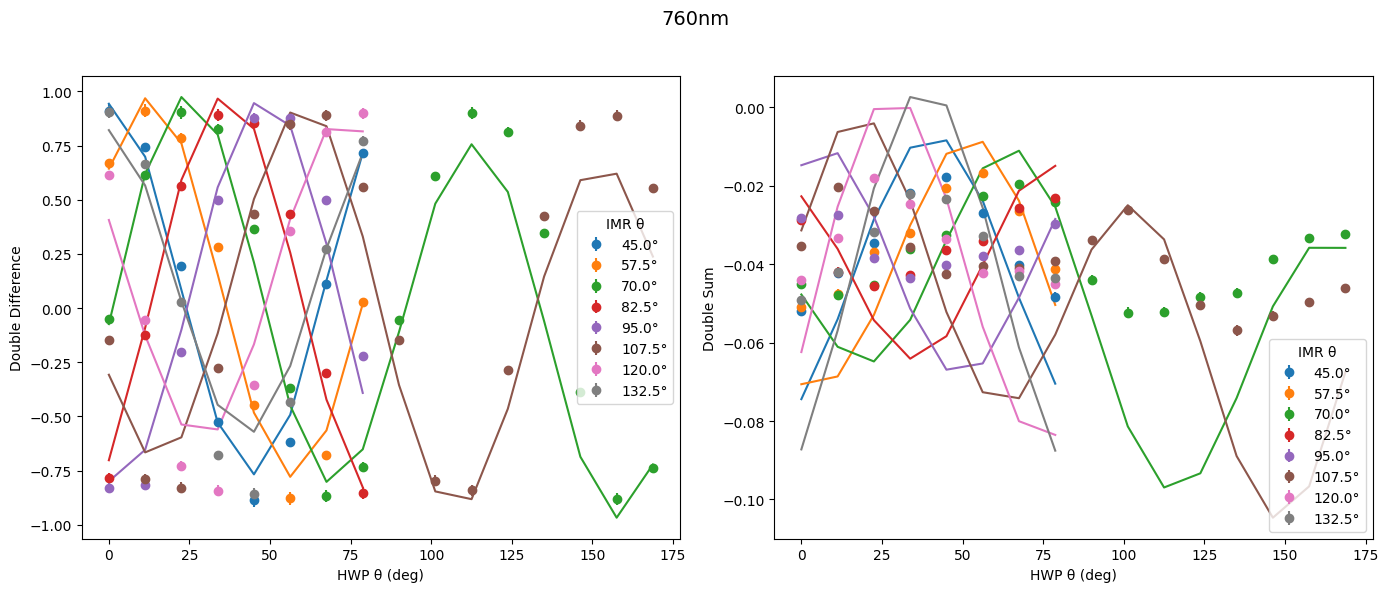

After p0: {'dichroic': {'phi': np.float64(4.843810989280223e-06), 'epsilon': np.float64(0.015051504961155586), 'theta': np.float64(-10.0)}, 'flc': {'phi': np.float64(3.14203547963624), 'delta_theta': np.float64(4.999996484599873)}, 'optics': {'phi': np.float64(1.6955573609989933), 'epsilon': np.float64(4.933479179997121e-09), 'theta': np.float64(-6.283056975755153)}, 'image_rotator': {'phi': np.float64(3.271760449435874)}, 'hwp': {'phi': np.float64(2.813431375977715), 'delta_theta': np.float64(4.999999429420129)}, 'lp': {'theta': np.float64(1.2139350501497157)}}
Before p0: {'dichroic': {'phi': np.float64(4.843810989280223e-06), 'epsilon': np.float64(0.015051504961155586), 'theta': np.float64(-10.0)}, 'flc': {'phi': np.float64(3.14203547963624), 'delta_theta': np.float64(4.999996484599873)}, 'optics': {'phi': np.float64(1.6955573609989933), 'epsilon': np.float64(4.933479179997121e-09), 'theta': np.float64(-6.283056975755153)}, 'image_rotator': {'phi': np.float64(3.271760449435874)}, 'hw

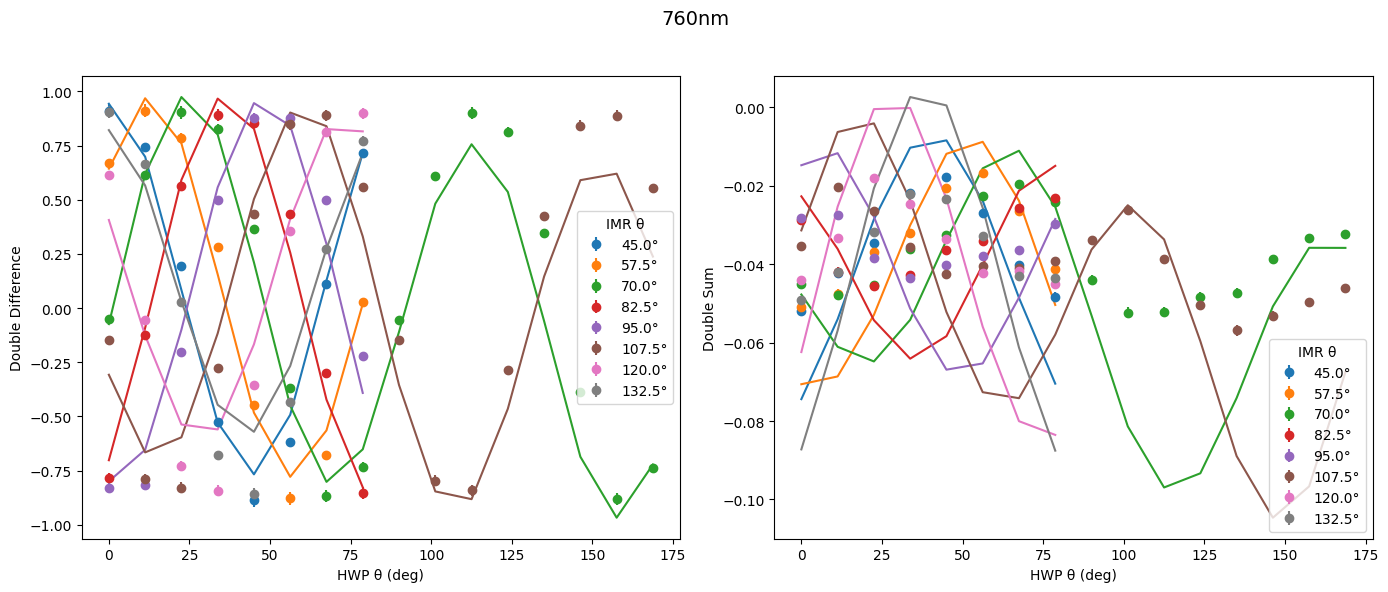

After p0: {'dichroic': {'phi': np.float64(3.8392131645706435e-07), 'epsilon': np.float64(0.015050706259719557), 'theta': np.float64(-10.0)}, 'flc': {'phi': np.float64(3.142038767159459), 'delta_theta': np.float64(4.999999842416247)}, 'optics': {'phi': np.float64(1.695526454379035), 'epsilon': np.float64(0.0), 'theta': np.float64(-6.282269875837003)}, 'image_rotator': {'phi': np.float64(3.2717641793862966)}, 'hwp': {'phi': np.float64(2.8134056081574412), 'delta_theta': np.float64(4.999999992399257)}, 'lp': {'theta': np.float64(1.2154329827057673)}}


In [25]:
# Defining wavelength
for i, wavelength in enumerate(wavelengths):
    interleaved_values, interleaved_stds, configuration_list = inst.read_csv(file_path, 
        obs_mode = obs_modes[i], obs_filter = wavelength, flc_a_theta = 0, flc_b_theta = 43)

    # if obs_modes[i] == "IPOL":
    #   filename = previous_fits_directory + wavelength + "nm_ten_percent_IMR_offset_or_IMR_and_HWP_constraints_FLC_0_to_43_dichroic_ten_degree_constraints.txt"
    
    filename = previous_fits_directory + str(wavelength) + "nm_ten_percent_retardance_constraints_dichroic_theta_0_optics_theta_0.txt"

    # Using closest broadband files    
    with open(filename, "r") as f:
        past_fit = json.load(f)
    print(past_fit)

    theta_pol = past_fit["lp"]["theta"]
    delta_HWP = past_fit["hwp"]["phi"] 
    offset_HWP = past_fit["hwp"]["delta_theta"]
    delta_derot = past_fit["image_rotator"]["phi"] 
    delta_opts = past_fit["optics"]["phi"]
    epsilon_opts = past_fit["optics"]["epsilon"]
    rot_opts = past_fit["optics"]["theta"]
    delta_dichroic = past_fit["dichroic"]["phi"]
    epsilon_dichroic = past_fit["dichroic"]["epsilon"]
    rot_dichroic = past_fit["dichroic"]["theta"]
    delta_FLC = past_fit["flc"]["phi"] 
    rot_FLC = past_fit["flc"]["delta_theta"]
    em_gain = em_gains[i] # from EM gain measurements

    print("HWP retardance: " + str(delta_HWP))

    # NOTE: Components must be listed downstream to upstream
    # Define the instrument configuration as a system dictionary
    system_dict = {
        "components": {
            "wollaston": {
                "type": "wollaston_prism_function",
                "properties": {"beam": "o", "transmission_ratio": em_gain},
            },
            "dichroic": {
                "type": "diattenuator_retarder_function",
                "properties": {'phi': delta_dichroic, 
                    'epsilon': epsilon_dichroic, 
                    # 'theta': rot_dichroic
                    'theta': 0},
            },
            "flc": {
                "type": "general_retarder_function",
                "properties": {"phi": delta_FLC, "theta": 0, "delta_theta": rot_FLC},
            },
            "optics": {
                "type": "diattenuator_retarder_function",
                "properties": {'phi': delta_opts, 
                    'epsilon': epsilon_opts, 
                    # 'theta': rot_opts,
                    'theta': 0
                    },
            },
            "image_rotator": {
                "type": "general_retarder_function",
                "properties": {"phi": delta_derot, "theta": 0, "delta_theta": 0},
            },
            "hwp": {
                "type": "general_retarder_function",
                "properties": {"phi":  delta_HWP, "theta": 0, "delta_theta": offset_HWP},
            },
            "lp": {
                "type": "general_linear_polarizer_function_with_theta",
                "properties": {"theta": theta_pol},
            },
        }
    }

    bounds = [ 
    (0, 2 * np.pi), # dichroic_retardance
    (0, 1), # dichroic_diattenuation
    (-10, 10), # dichroic_rotation_angle 
    (0.4 * 2 * np.pi, 0.6 * 2 * np.pi),  # delta_FLC
    (-5, 5),  # rot_FLC
    (0, 2 * np.pi),  # delta_opts
    (0, 1),  # epsilon_opts
    (-10, 10),  # rot_opts
    (delta_derot - (delta_derot * 0.1), delta_derot + (delta_derot * 0.1)),  # delta_derot
    (delta_HWP - (delta_HWP * 0.1), delta_HWP + (delta_HWP * 0.1)),  # delta_HWP
    (-5, 5),  # offset_HWP
    (-5, 5),  # theta_pol
]

    # Turn dictionary into matrix
    system_mm = inst.generate_system_mueller_matrix(system_dict)
    print(system_mm.evaluate())

    # Set-up for p0
    p0 = {
    # "wollaston": {"transmission_ratio": em_gain}, 
    "dichroic": {"phi": np.abs(delta_dichroic), 
                 "epsilon": epsilon_dichroic, 
                 "theta": rot_dichroic
                 # "theta": 0
                 },
    "flc": {"phi": delta_FLC, "delta_theta": rot_FLC},
    "optics": {"phi": np.abs(delta_opts), 
               "epsilon": epsilon_opts, 
               "theta": rot_opts
               # "theta": 0
               },
    "image_rotator": {
                    "phi": delta_derot, 
                    # "delta_theta": 0
                    },
    "hwp": {"phi": delta_HWP, "delta_theta": offset_HWP},
    "lp": {"theta": theta_pol}
    }

    # Adding p0
    p0_values, p0_keywords = inst.parse_configuration(p0)
    s_in = np.array([1, 0, 0, 0])
    logl_value = inst.logl(p0_values, p0_keywords, system_mm, interleaved_values, interleaved_stds, configuration_list,
        s_in=s_in, logl_function=None, process_dataset=inst.process_dataset, process_errors=inst.process_errors, 
        process_model=inst.process_model)
    print("logl value: " + str(logl_value))

    # Plotting intial plot
    updated_system_mm = inst.update_system_mm(p0_values, p0_keywords, system_mm)
    model = inst.model(p0_values, p0_keywords, system_mm, configuration_list, 
        process_model = inst.process_model)

    inst.plot_data_and_model(interleaved_values, interleaved_stds, model, 
        configuration_list, wavelength = wavelength)

    # Iterative Fitting
    # Unpolarized light for s_in as there is LP in the system already
    s_in = np.array([1, 0, 0, 0])

    # Counters for iterative fitting
    iteration = 1
    previous_logl_value = 1000000
    new_logl_value = 0

    while abs(previous_logl_value - new_logl_value) > 0.01 * abs(previous_logl_value):
        print("Before p0: " + str(p0))
        if iteration > 1: 
            previous_logl_value = new_logl_value
        result, new_logl_value = inst.minimize_system_mueller_matrix(p0, system_mm, 
            interleaved_values, interleaved_stds, configuration_list, s_in = s_in,
            process_dataset = inst.process_dataset, 
            process_errors = inst.process_errors, 
            process_model = inst.process_model, bounds = bounds)
        
        # Print statements
        print("Iteration #: " + str(iteration))
        print("logl_value: " + str(new_logl_value))
        print("Best Fit Parameters: " + str(result.x))

        # Making a plotloa
        updated_system_mm = inst.update_system_mm(result.x, p0_keywords, system_mm)
        model = inst.model(result.x, p0_keywords, updated_system_mm, configuration_list, 
        process_model = inst.process_model)

        save_path = save_fits_directory + str(wavelength) + "nm_ten_percent_retardance_constraints_dichroic_theta_0_optics_theta_0_reduced_errors.png"
        inst.plot_data_and_model(interleaved_values, interleaved_stds, model, 
            configuration_list, wavelength = wavelength, save_path = save_path)

        # Updating p0 for next time
        inst.update_p0(p0, result.x)
        print("After p0: " + str(p0))

        iteration += 1

        filename = save_fits_directory + str(wavelength) + "nm_ten_percent_retardance_constraints_dichroic_theta_0_optics_theta_0_reduced_errors.txt"
        with open(filename, 'w') as f:
            json.dump(p0, f, indent=4)

# Printing table of final values

In [26]:
# Load p0 from .txt files for each wavelength and print a summary table (retardances in waves)
import pandas as pd
import json
import numpy as np
def radians_to_waves(rad):
    return rad / (2 * np.pi)
 
summary_rows = []
param_names = [
    'wavelength',
    'dichroic_phi (waves)', 'dichroic_epsilon', 'dichroic_theta',
    'flc_phi (waves)', 'flc_delta_theta',
    'optics_phi (waves)', 'optics_epsilon', 'optics_theta',
    'image_rotator_phi (waves)',
    'hwp_phi (waves)', 'hwp_delta_theta',
    'lp_theta'
 ]
 
# Directory and file pattern for saved p0 files
save_fits_directory = "/home/rebeccaz/Github/vampires_calibration/scipy_minimize/data_files/produced/FLC_0_to_43_ten_percent_retardance_constraints_dichroic_theta_0_optics_theta_0_reduced_errors/"
file_pattern = "{wavelength}nm_ten_percent_retardance_constraints_dichroic_theta_0_optics_theta_0_reduced_errors.txt"
 
wavelengths = [
              610, 
              670, 
              720, 
               760]

for wl in wavelengths:
    filename = save_fits_directory + file_pattern.format(wavelength=wl)
    try:
        with open(filename, 'r') as f:
            p0 = json.load(f)
        row = {
            'wavelength': wl,
            'dichroic_phi (waves)': radians_to_waves(p0['dichroic']['phi']),
            'dichroic_epsilon': p0['dichroic']['epsilon'],
            'dichroic_theta': p0['dichroic']['theta'],
            'flc_phi (waves)': radians_to_waves(p0['flc']['phi']),
            'flc_delta_theta': p0['flc']['delta_theta'],
            'optics_phi (waves)': radians_to_waves(p0['optics']['phi']),
            'optics_epsilon': p0['optics']['epsilon'],
            'optics_theta': p0['optics']['theta'],
            'image_rotator_phi (waves)': radians_to_waves(p0['image_rotator']['phi']),
            'hwp_phi (waves)': radians_to_waves(p0['hwp']['phi']),
            'hwp_delta_theta': p0['hwp']['delta_theta'],
            'lp_theta': p0['lp']['theta']
        }
        summary_rows.append(row)
    except Exception as e:
        print(f"Could not load {filename}: {e}")
 
df = pd.DataFrame(summary_rows, columns=param_names)
print("\nSummary of final p0 values for each wavelength (retardances in waves):")
print(df.to_string(index=False))


Summary of final p0 values for each wavelength (retardances in waves):
 wavelength  dichroic_phi (waves)  dichroic_epsilon  dichroic_theta  flc_phi (waves)  flc_delta_theta  optics_phi (waves)  optics_epsilon  optics_theta  image_rotator_phi (waves)  hwp_phi (waves)  hwp_delta_theta  lp_theta
        610          3.832276e-01      1.404900e-07        5.789502         0.462398        -4.999236            0.279825        0.002765     -3.151625                   0.215714         0.427039         0.363599  4.999988
        670          1.490453e-01      3.284489e-09        2.968349         0.479113         0.214060            0.329576        0.002542      1.859189                   0.317074         0.458987        -1.051483  1.488442
        720          1.638853e-05      4.488078e-03        9.999991         0.499990         2.214876            0.282111        0.014765      2.358247                   0.417718         0.476957        -1.115615  0.859344
        760          6.110298e-08   